In [1]:
function model = generate_non_gaussian_sequence(lambda, samples)
    mu = 0;
    sigma = 1;

    % Gaussian white noise
    g1 = randn(samples,1);
    g2 = randn(samples,1);

    % Non-Gaussian multiplicative model
    model = g1 .* exp(lambda * g2 - lambda^2);
end

In [2]:
function cascade = generate_cascade(cascade_steps, samples, lambda)

    if nargin < 1 || cascade_steps == -1
        cascade_steps = floor(log2(samples));   % full cascade
    end
    if nargin < 2
        samples = 2^15;
    end
    if nargin < 3
        lambda = 0.1;
    end

    mu = 0;
    sigma = 1;

    % Start with Gaussian white noise (lambda = 0)
    cascade = generate_non_gaussian_sequence(0, samples);

    powers = floor(log2(samples));

    for step = 0:(cascade_steps-1)
        interval_len = samples / 2^step;

        for interval_index = 0:(2^step - 1)

            idx1 = interval_index * interval_len + 1;
            idx2 = (interval_index + 1) * interval_len;

            % Lognormal multiplier
            multiplier = exp(lambda * randn(1) - lambda^2);

            % Apply multiplicative weight
            cascade(idx1:idx2) = cascade(idx1:idx2) * multiplier;
        end
    end
end


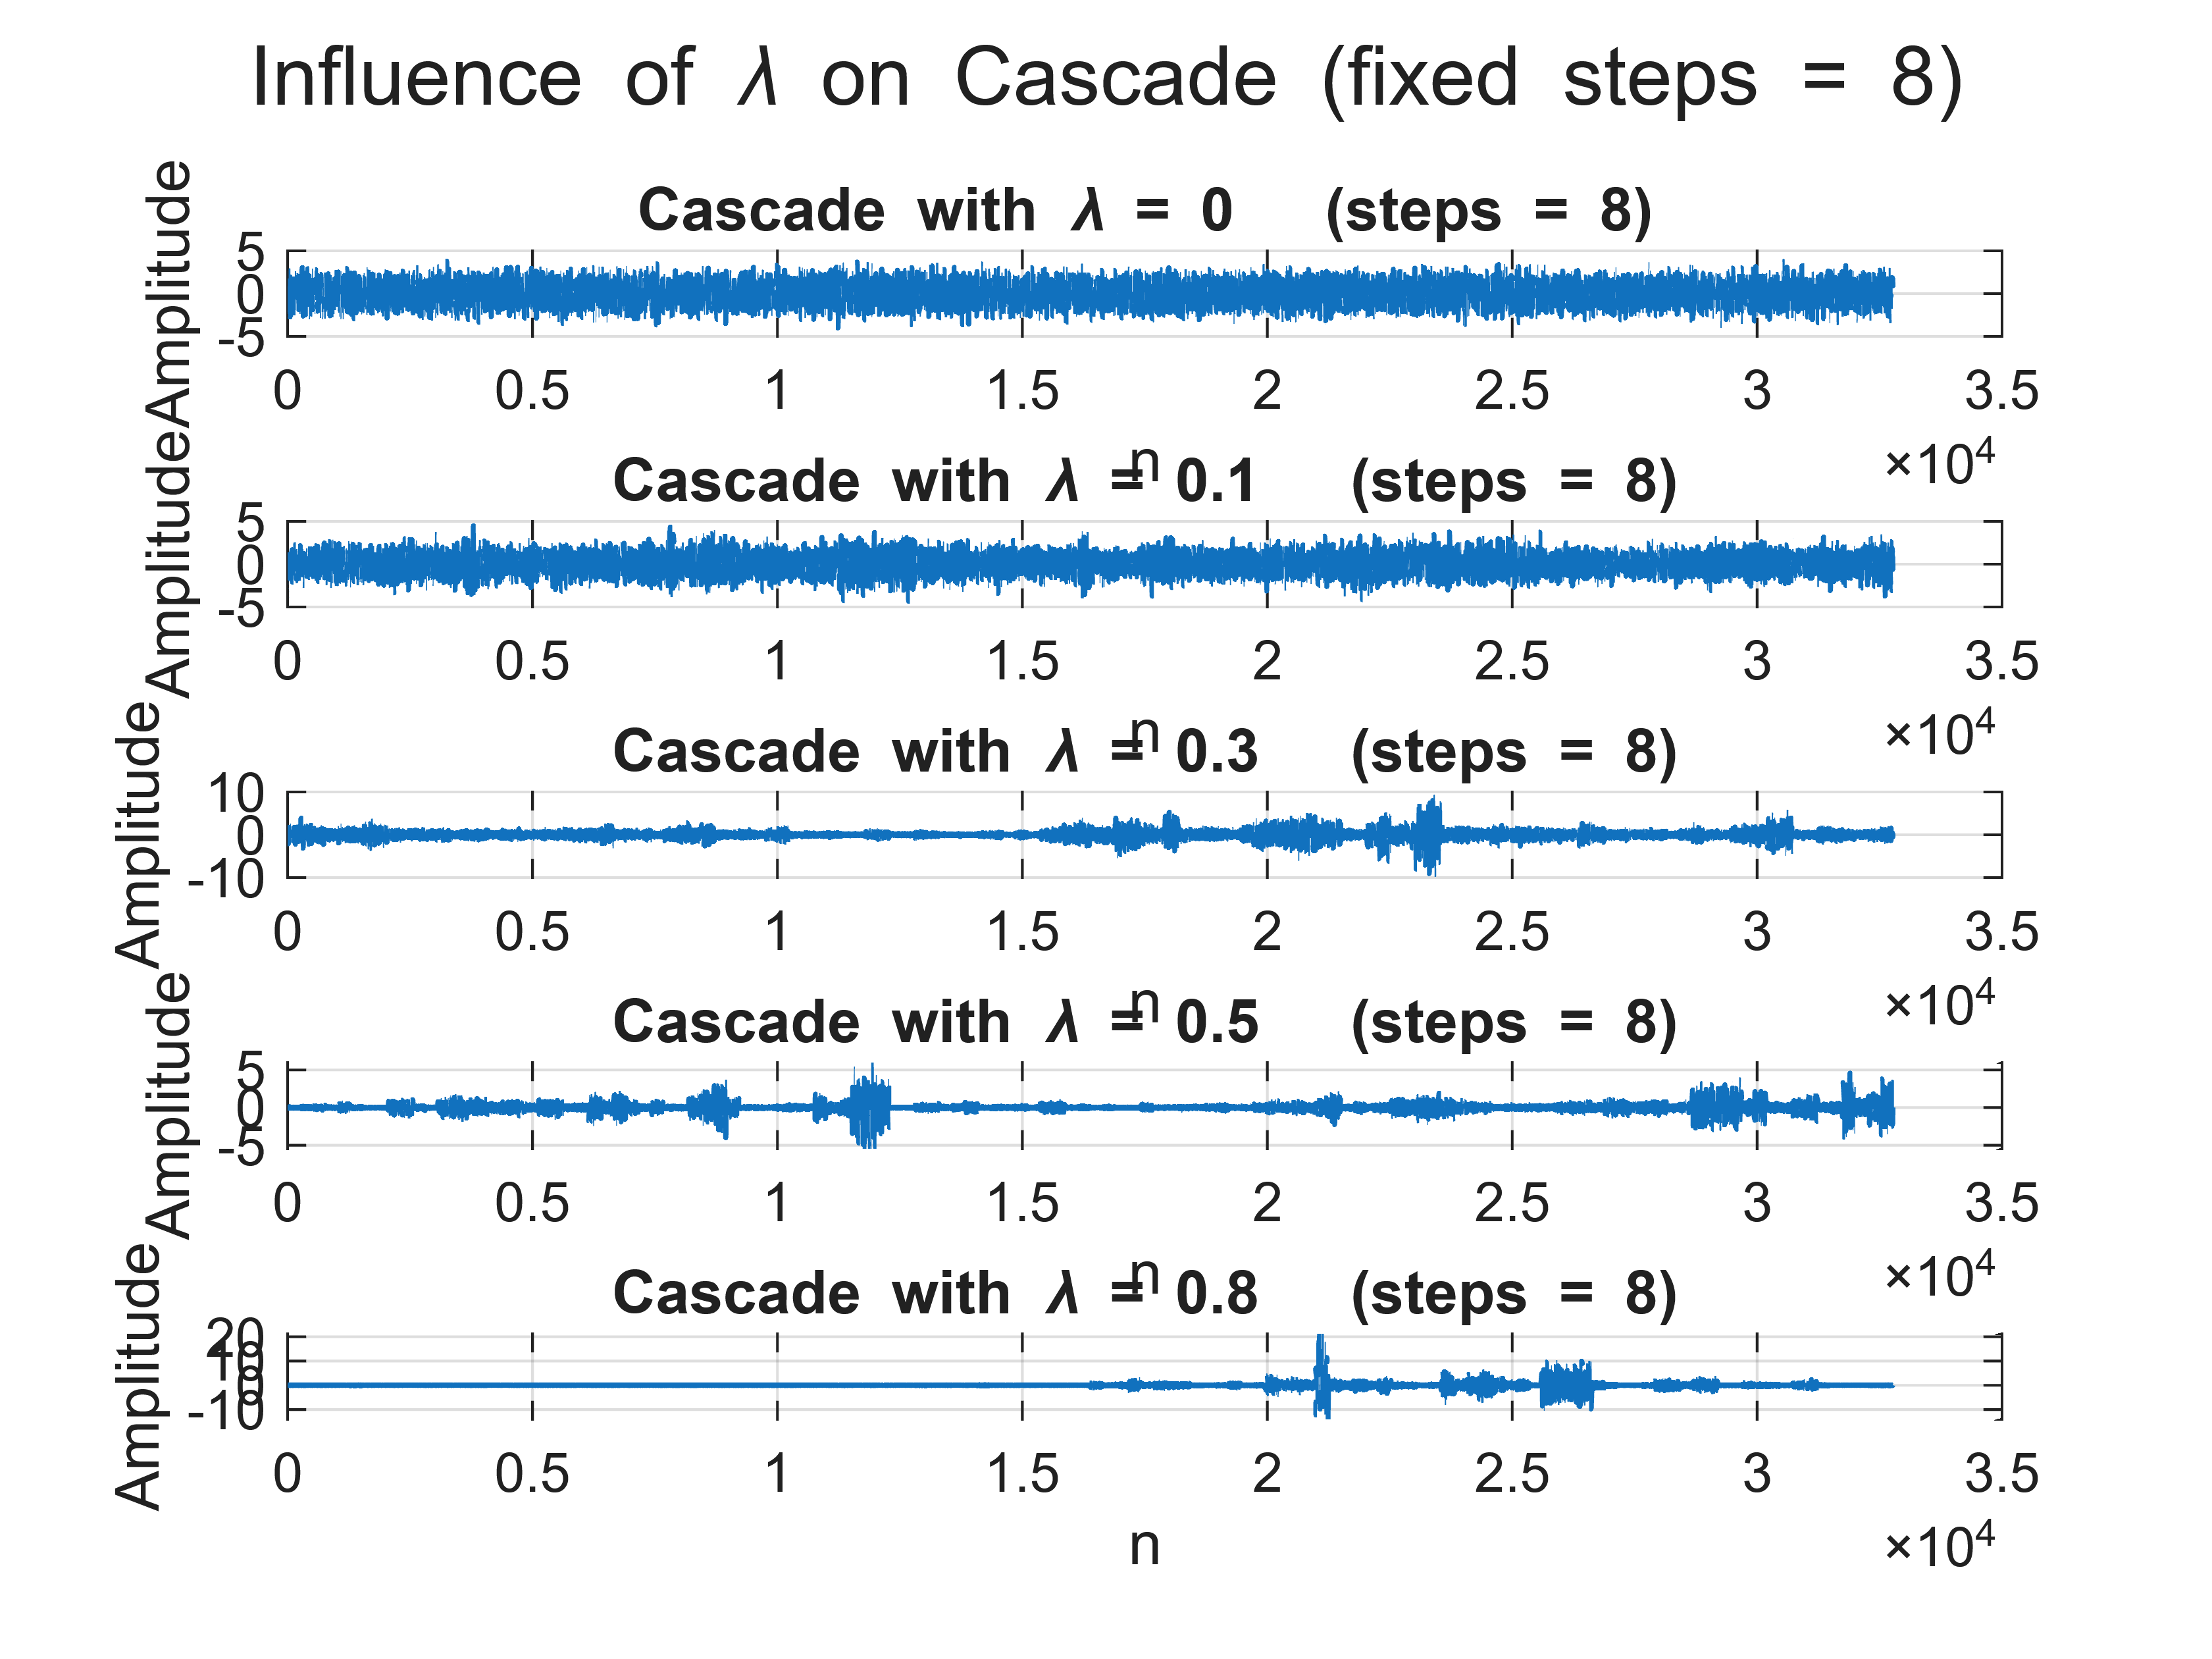

In [3]:
clear; close all; clc;

%% ---------------------------------------------------------
% PARAMETERS
% ---------------------------------------------------------
samples = 2^15;

lambda_vals = [0, 0.1, 0.3, 0.5, 0.8];     % different λ values
steps_vals  = [1, 3, 5, 8, 12];             % different cascade depths

numL = numel(lambda_vals);
numS = numel(steps_vals);

%% ---------------------------------------------------------
% 1. COMPARE DIFFERENT λ VALUES (fixed cascade depth)
% ---------------------------------------------------------
fixed_steps = 8;

figure;
for i = 1:numL
    lambda = lambda_vals(i);

    x = generate_cascade(fixed_steps, samples, lambda);

    subplot(numL, 1, i)
    plot(x, 'LineWidth', 1.0)
    title("Cascade with \lambda = " + string(lambda) + ...
          "   (steps = " + string(fixed_steps) + ")")
    xlabel("n")
    ylabel("Amplitude")
    grid on
end

sgtitle("Influence of \lambda on Cascade (fixed steps = " + string(fixed_steps) + ")")


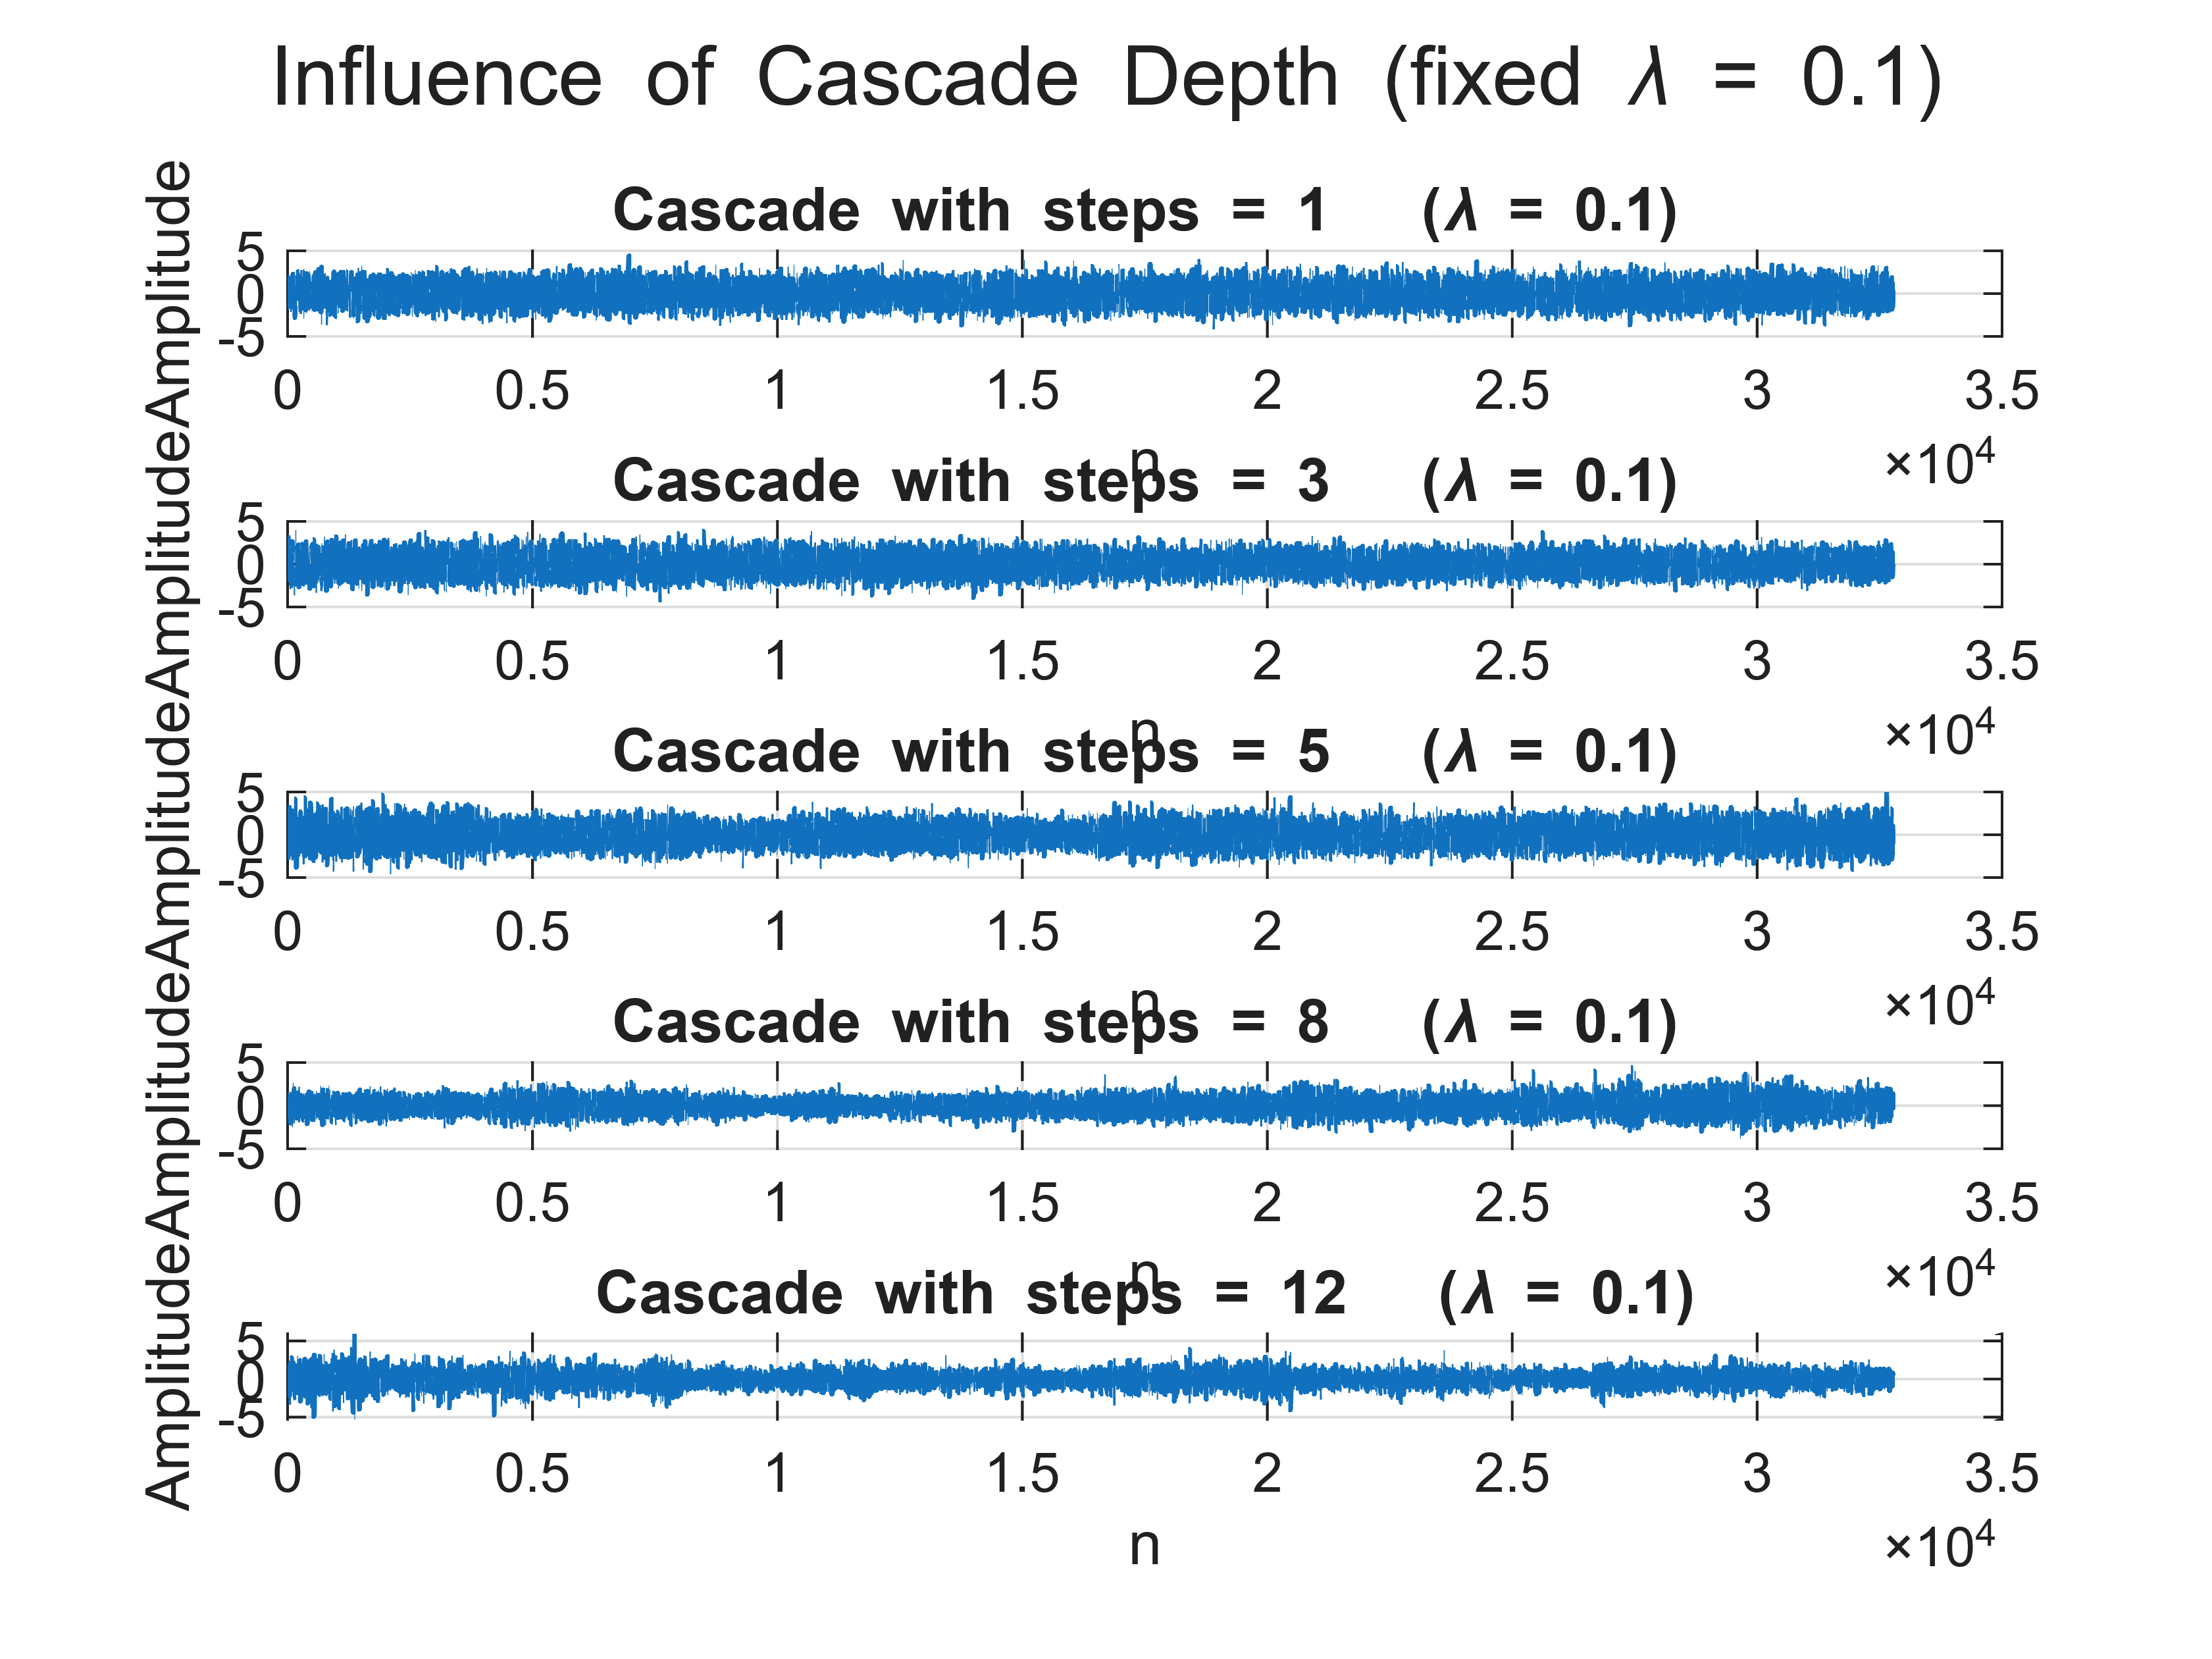

In [4]:

%% ---------------------------------------------------------
% 2. COMPARE DIFFERENT CASCADE DEPTHS (fixed λ)
% ---------------------------------------------------------
fixed_lambda = 0.1;

figure;
for i = 1:numS
    steps = steps_vals(i);

    x = generate_cascade(steps, samples, fixed_lambda);

    subplot(numS, 1, i)
    plot(x, 'LineWidth', 1.0)
    title("Cascade with steps = " + string(steps) + ...
          "   (\lambda = " + string(fixed_lambda) + ")")
    xlabel("n")
    ylabel("Amplitude")
    grid on
end

sgtitle("Influence of Cascade Depth (fixed \lambda = " + string(fixed_lambda) + ")")


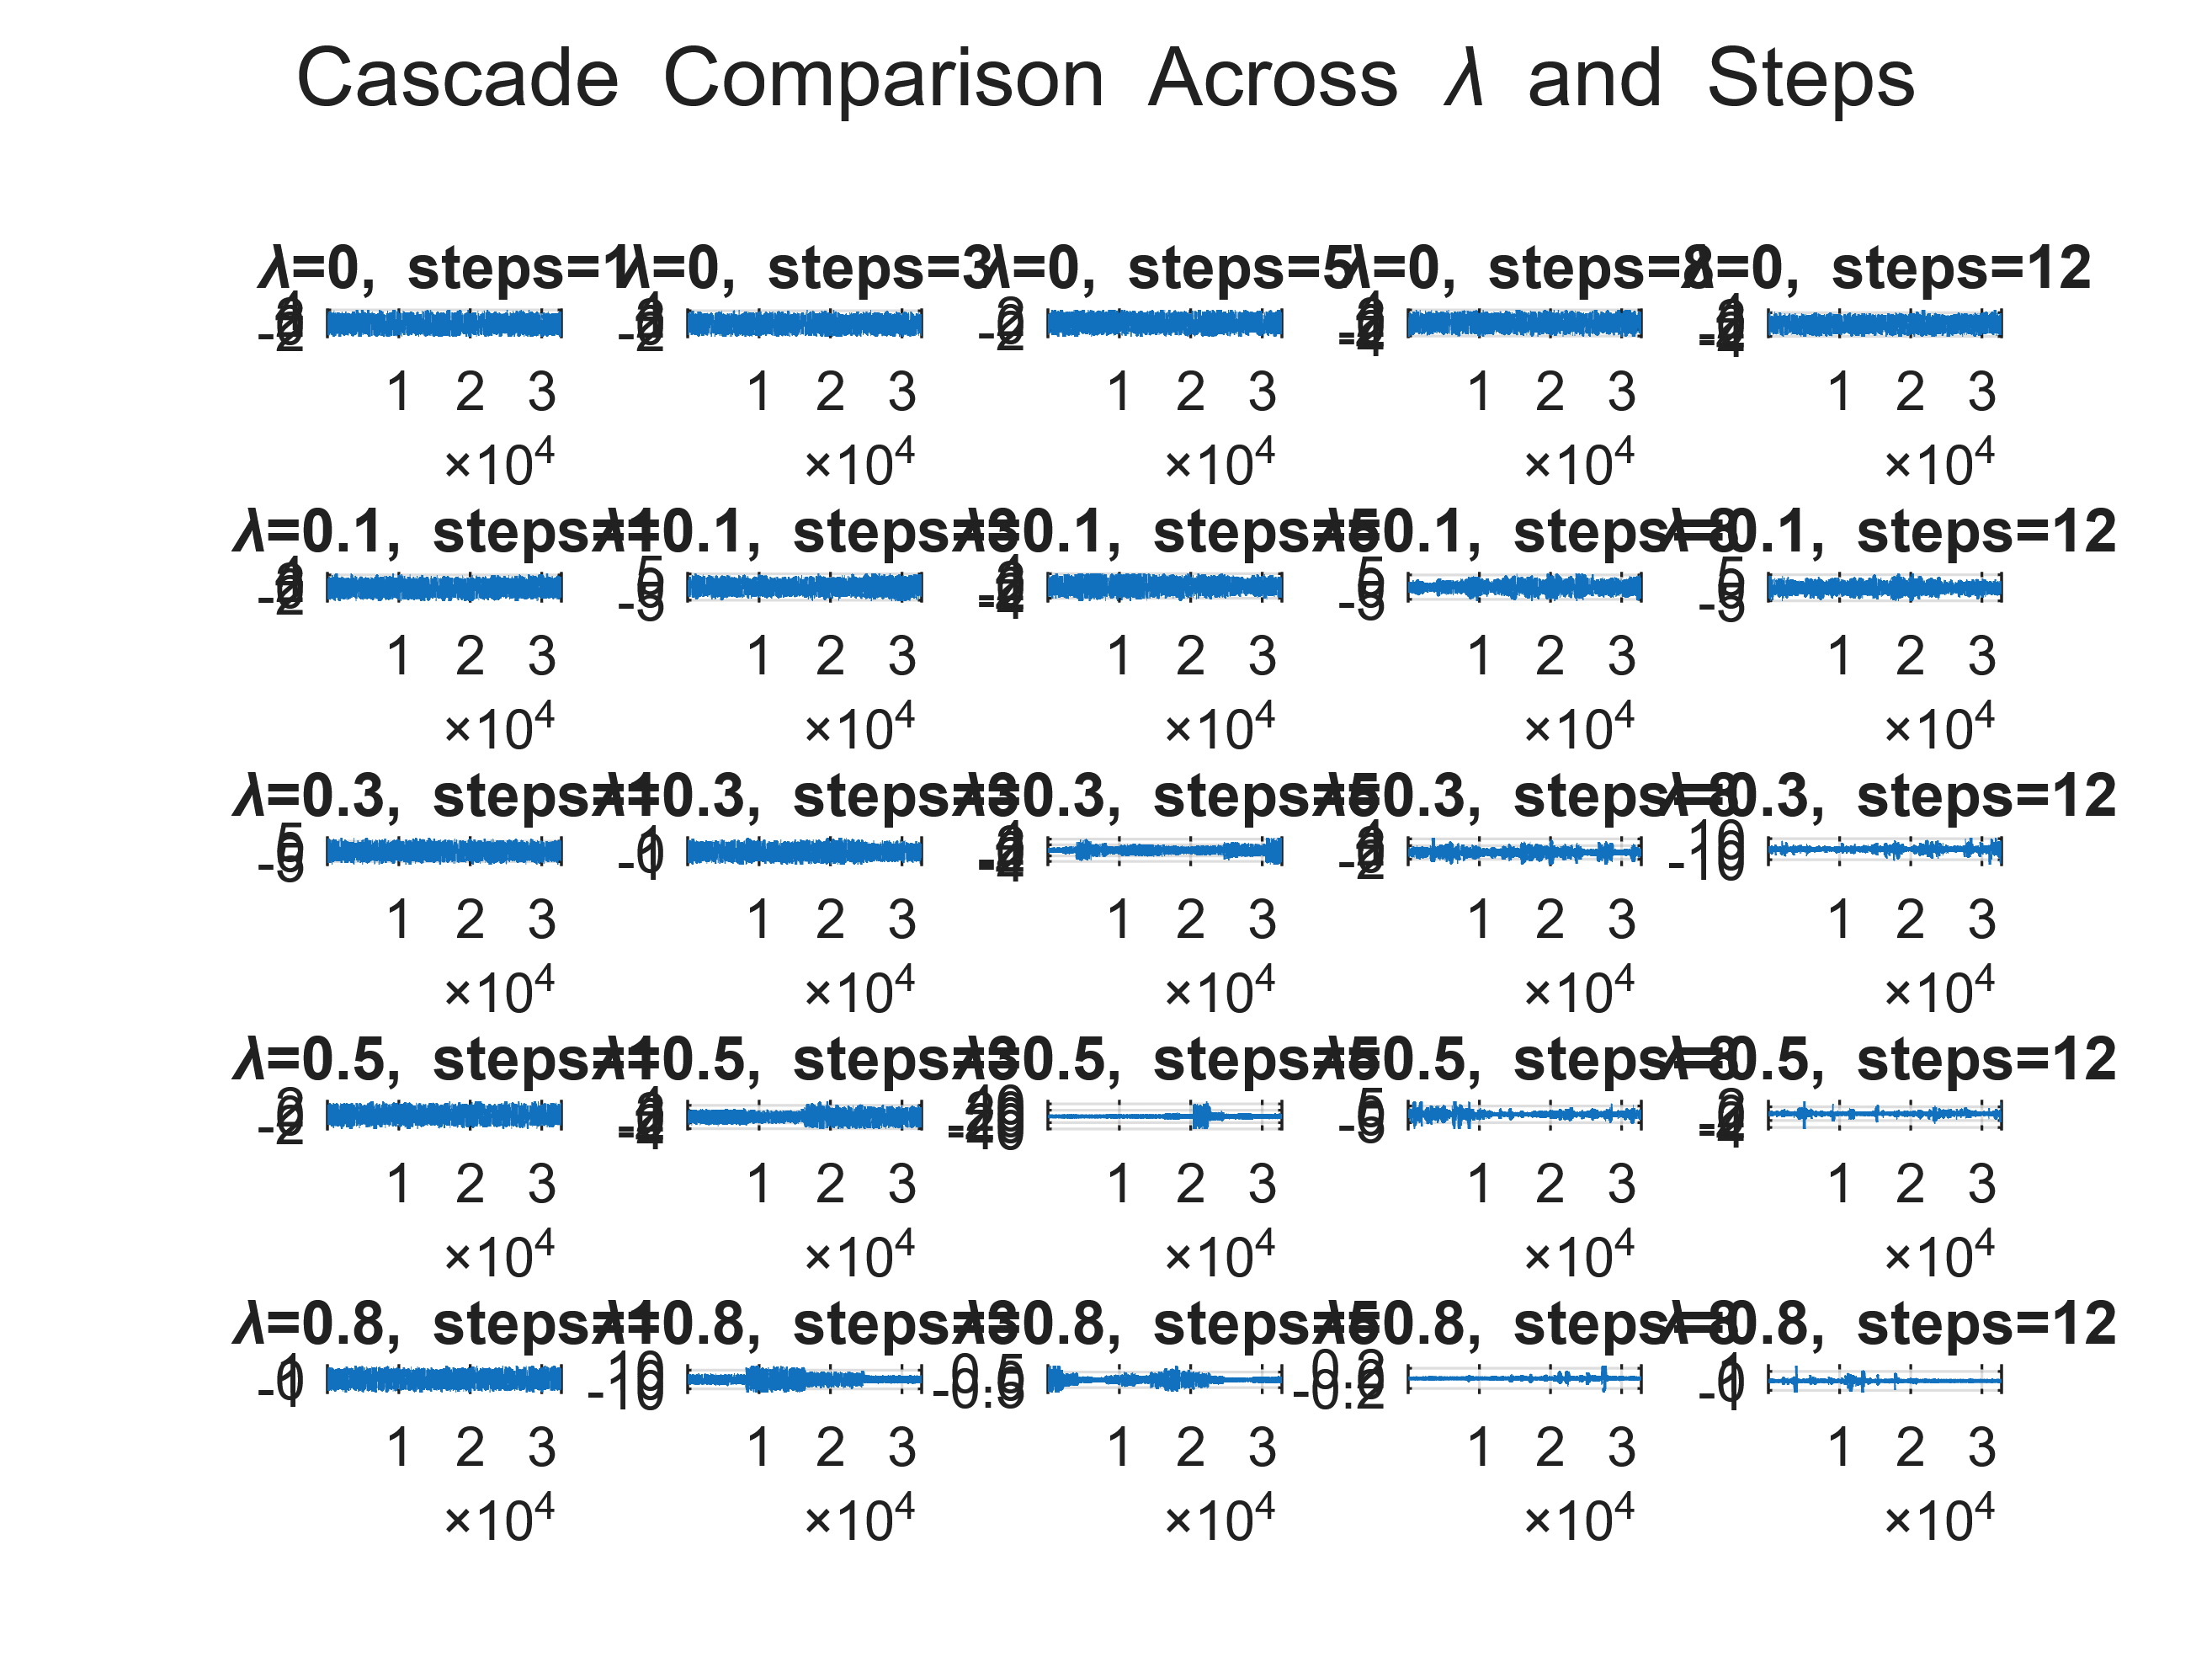

In [5]:

%% ---------------------------------------------------------
% 3. FULL GRID: λ vs steps
% ---------------------------------------------------------
figure;
plot_index = 1;

for i = 1:numL
    for j = 1:numS

        lambda = lambda_vals(i);
        steps  = steps_vals(j);

        x = generate_cascade(steps, samples, lambda);

        subplot(numL, numS, plot_index)
        plot(x, 'LineWidth', 0.8)
        title("\lambda=" + string(lambda) + ", steps=" + string(steps))
        axis tight
        grid on

        plot_index = plot_index + 1;
    end
end

sgtitle("Cascade Comparison Across \lambda and Steps")